# Практическая работа 1

## Тема: геометрические преобразования и монокулярное зрение

### Задачи: 
* знакомство с python, numpy, jupyter, matplotlib и проч.
* применение пройденных геометрических преобразований
* применение законов центральной проекции
* применение обратного проецирования с априорными знаниями
* ???
* Profit 

### Prerequirements 
* интерпретатор python 2.7.xx
* библиотеки numpy, matplotlib, scipy

Это - интерактивная веб-оболочка для последовательного выполнения команд на языке Python.
Она состоит из клеток(Cell), которые могут содержать как программный код, так и текст в синтаксисе разметки Markdown.

Попробуйте для проверки изменить содержимое данного Cell. 

Далее следует Cell с исходным кодом.
Запустите ее чтобы получить результат

In [1]:
# тут можно вставлять комментарии
print 'hello, world!. ', str(5 + 7)

def generate_random_number():
    return 4

hello, world!.  12


In [2]:
# разные клеточки делят все имена функций, классов, переменные и их значения.
# а так же импортнутые модули и проч.
print 'rolling... '
print generate_random_number()

rolling... 
4


Итак, давайте
### Приступим к заданию

для начала проверим, что установлены все библиотеки.
у меня следующий код выводит что-то вроде


numpy found, version is  1.11.0

matplotlib found, version is  1.5.3

scipy found, version is  0.17.0

In [3]:
#coding=utf-8
import numpy as np
print 'numpy found, version is ', np.__version__

import matplotlib as mpl
import matplotlib.pyplot as plt # pyplot - обертка matplotlib для интерактивного графопостроения.
print 'matplotlib found, version is ', mpl.__version__

import scipy
print 'scipy found, version is ', scipy.__version__

numpy found, version is  1.11.2
matplotlib found, version is  1.5.1
scipy found, version is  0.18.0


Если не вылезли ошибки, значит все хорошо и можно двигаться дальше. 

## 1. Движения
Для начала сгенерируем точки которые будем двигать.

In [4]:
import numpy.random

def generate_2d_points(N):
    return np.random.multivariate_normal(np.zeros(2), np.eye(2), N)

points = generate_2d_points(10)

print 'points generated. ', points.shape
print points

points generated.  (10, 2)
[[ 1.17078706 -1.74138979]
 [ 1.02824739 -2.17891036]
 [-0.70893217  0.83874379]
 [-0.88522202  0.9007972 ]
 [ 0.16246732  0.27211056]
 [-0.43815516 -0.96356043]
 [-1.72366565 -1.14174906]
 [ 1.69425184  0.54422576]
 [-0.07573284  0.40228343]
 [ 1.20472613 -2.55966749]]


Мы сгенерировали массив точек, сами точки лежат вдоль первой координаты, их координаты - вдоль второй координаты.
Можно посмотреть на наши точки:

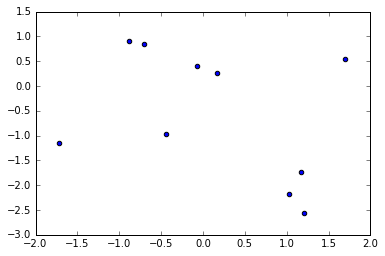

In [5]:
# если эта строчка вызывает ошибки - обновить ipython и matplotlib. или убрать ее
# или заменить на matplotlib inline.
%matplotlib inline 

plt.scatter(points[:, 0], points[:, 1])
plt.show()

### Задача 1.1
Напишите функцию для генерации 3хмерных точек:

In [6]:
def generate_3d_points(N):
    return np.random.multivariate_normal(np.zeros(3), np.eye(3), N)

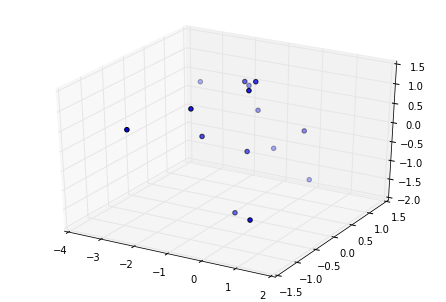

In [7]:
f = plt.figure()
from mpl_toolkits import mplot3d
ax = mplot3d.Axes3D(f)

points3D = generate_3d_points(15)
ax.scatter(points3D[:, 0], points3D[:, 1], points3D[:, 2])

Теперь попробуем повернуть наше облако точек:

In [8]:
def rot_matrix(angles):
    cos = [np.math.cos(a) for a in angles]
    sin = [np.math.sin(a) for a in angles]
    Rz = np.array([[cos[2], -sin[2], 0],
                   [sin[2], cos[2],  0],
                   [     0,      0,  1]])

    Ry = np.array([[ cos[1], 0, sin[1]],
                   [      0, 1,      0],
                   [-sin[1], 0, cos[1]]])

    Rx = np.array([[1,      0,       0],
                   [0, cos[0], -sin[0]],
                   [0, sin[0], cos[0]]])
    #Rs = [Rx, Ry, Rz]
    return Ry.dot(Rx).dot(Rz)

R = rot_matrix([np.pi / 6.0, 0, np.pi / 3.0])
print 'R = ', R
print '||R||_2 = ', np.linalg.norm(R, ord=2)
print '|R| = ', np.linalg.det(R)


R =  [[ 0.5       -0.8660254  0.       ]
 [ 0.75       0.4330127 -0.5      ]
 [ 0.4330127  0.25       0.8660254]]
||R||_2 =  1.0
|R| =  1.0


### Задача 1.2(*)
Напишите функцию, вычисляющую углы поворота из матрицы поворота


In [9]:
print R[2][0]

0.433012701892


In [10]:
def rot_angles(matrix):
    if matrix[2][0] != -1 and matrix[2][0] != 1:
        tetha_1 = np.arcsin(-matrix[1][2])
        tetha_2 = -np.arcsin(-matrix[1][2]) + np.pi
        etha_1 = np.arctan2(matrix[1][0]/np.cos(tetha_1), matrix[1][1]/np.cos(tetha_1))
        etha_2 = np.arctan2(matrix[1][0]/np.cos(tetha_2), matrix[1][1]/np.cos(tetha_2))
        phi_1 = np.arctan2(matrix[0][2]/np.cos(tetha_1), matrix[2][2]/np.cos(tetha_1))
        phi_2 = np.arctan2(matrix[0][2]/np.cos(tetha_2), matrix[2][2]/np.cos(tetha_2))
        return [(tetha_1, phi_1, etha_1), (tetha_2, phi_2, etha_2)]
    else:
        phi = 0
        if matrix[2][0] == -1:
            tetha = np.pi/2
            etha = phi + np.arctan2(matrix[2][0],matrix[2][1])
        else:
            tetha = -np.pi/2
            etha = -phi + np.arctan2(-matrix[2][0], -matrix[2][1])
        return (tetha, phi, etha)
print rot_angles(R)
assert rot_angles(R)[0] == (np.pi / 6.0, 0, np.pi / 3.0)

[(0.52359877559829882, 0.0, 1.0471975511965976), (2.6179938779914944, -3.1415926535897931, -2.0943951023931957)]


### Задача 1.3. применение движений к точкам
* Примените операцию поворота к массиву points3D.
* Добавьте к повороту смещение на вектор t=[0,10,0]

In [11]:
def multiply(vector, matrix):
    return matrix.dot(vector.T).T

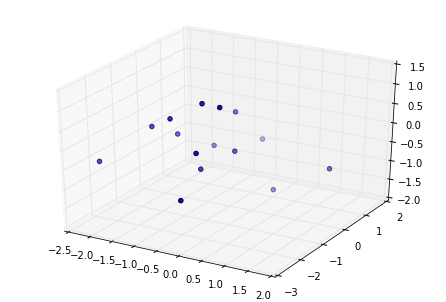

In [12]:
# поворот вставьте сюда. отобразите результат
def rotate(points, rot_mat):
    return multiply(points, rot_mat)

rotated_points = rotate(points3D, R)

f = plt.figure()

ax = mplot3d.Axes3D(f)

ax.scatter(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2])

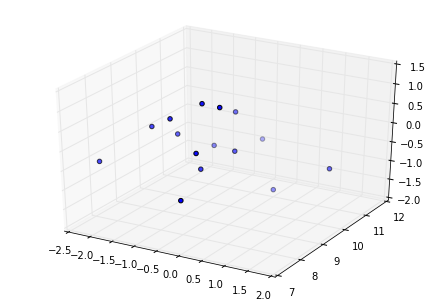

In [13]:
t = np.array([0.0, 10.0, 0.0])
# сдвиг вставьте сюда. отобразите результат
def translate(points, t):
    return points + t

translated_points = translate(rotated_points, t)

f = plt.figure()

ax = mplot3d.Axes3D(f)

ax.scatter(translated_points[:, 0], translated_points[:, 1], translated_points[:, 2])

Теперь перейдем к однородным координатам.
Используйте функцию 'np.hstack', чтобы присоединить единичку к векторам-точкам.

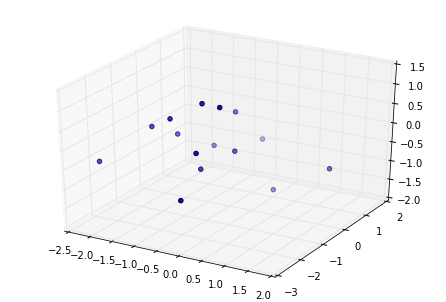

In [14]:
def make_homogenous(points):
    return np.hstack([points, np.ones(points.shape[0]).reshape(points.shape[0], 1)])

# вставьте движение точек с помощью однородных координат сюда. отобразите результат
def move(points, rot_mat, t):
    homogenous_points = make_homogenous(points)
    rotation_matrix = np.hstack([rot_mat, t.reshape((t.shape[0], 1))])
    return multiply(homogenous_points, rotation_matrix)

moved_points = move(points3D, R, t)

f = plt.figure()

ax = mplot3d.Axes3D(f)

ax.scatter(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2])

Мы научились обращаться с массивом точек, поворачивать, двигать его, переводить в однородные координаты. 
Если в обозначенных функциях вы пользовались циклами, постарайтесь обойтись без них.

## 2. Проективное преобразование
### Задача 2.4
* Сгенерируйте 4 двумерные точки в общем положении (никакие 3 не лежат на одной прямой)
* Сгенерируйте случайное проективное преобразование
* Преобразуйте точки этим проективным преобразованием и отобразите на одном plot результаты до\после

In [15]:
def check_dat_points(p1,p2,p3):
    x_1, x_2, x_3, y_1, y_2, y_3 = p1[0], p2[0], p3[0], p1[1], p2[1], p3[1]
    return ((x_3 - x_1) / (x_2 - x_1) == (y_3 - y_1) / (y_2 - y_1))
def check_points(points):
    return check_dat_points(points[0], points[1], points[2]) and check_dat_points(points[0], points[1], points[3]) and check_dat_points(points[0], points[2], points[3]) and check_dat_points(points[1], points[2], points[3]) 
def check_projective(matrix):
    return np.linalg.det(matrix) == 0

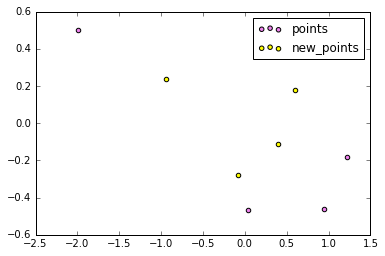

In [16]:
%matplotlib inline
points = generate_2d_points(4)
while check_points(points):
    points = generate_2d_points(4)
matrix = np.random.random((3, 3))
while check_projective(matrix):
    matrix = np.random.random((3, 3))
new_points = multiply(make_homogenous(points), matrix)

plt.scatter(points[:, 0], points[:, 1], c = "violet")
plt.scatter(new_points[:, 0], new_points[:, 1], c = "yellow")
plt.legend(["points", "new_points"])
plt.show()

### Задача 2.5(*)
Сгенерируйте 4 точки в общем положении. Вычислите проективное преобразование переводящее их в 
а) прямоугольник
б) квадрат

In [17]:
#решение задачи 2.5*

## 3. Центральная проекция. Матрица камеры
В этой части практической работы мы будем работать с камерой.
Наши трехмерные точки, сгенерированный в первой части мы будем проецировать на изображение камеры и отображать.

In [18]:
from exceptions import ValueError

class Camera:
    '''Pinhole camera projection'''
    def __init__(self, R, t, K, size):
        # вставьте сюда проверку размеров и того что R - матрица поворота. 
        self.R = R
        assert(R.shape == (3, 3))
        self.t = t # смещение
        assert(t.shape == (3,))
        self.K = K # внутренняя матрица камеры
        assert(K.shape == (3, 3))
        self.size = size 
        
        #Приближенное решение ищем. Детерминант матрицы поворота близок к 1
        assert np.abs(np.linalg.det(R)-1)<0.0000001
        
        #P = K(R|t)
        self.P = self.K.dot(np.hstack([R, t.reshape(t.shape[0], 1)]))
    
    def project(self, points):
        if points.shape[1] == 3:
            homo_pts = self.K.dot(translate(rotate(points, self.R), self.t).T).T 
        elif points.shape[1] == 4:
            homo_pts = self.P.dot(points.T)
        else:
            raise ValueError('Incorrect points size for Camera.project: %s' % \
                             str(points.shape))
        return homo_pts[:, : 2] / homo_pts[:, 2].reshape(-1, 1)

### Задача 3.6
Поместите камеру так, чтобы все точки были спереди камеры.
Спроецируйте точки и отобразите средствами matplotlib (используйте функцию plt.scatter).


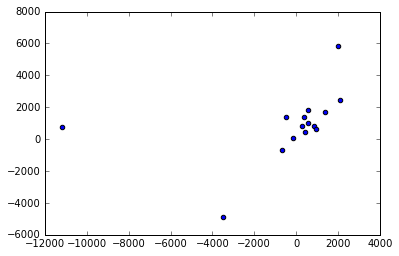

In [19]:
# решение задачи 3.6
K = np.array([[9.842439e+02, 0.000000e+00, 6.900000e+02],
              [0.000000e+00, 9.808141e+02, 2.331966e+02],
              [0.000000e+00, 0.000000e+00, 1.000000e+00]], dtype='float64')
R = np.eye(3, dtype='float64')
t = np.array([1, 1, 1], dtype='float64') # продобрать t используя статистики по Points
img_size = (600, 800)
cam = Camera(R=R, t=t, K=K, size=img_size)

# дебаг-проверка
# points3D = np.random.uniform(low=2,high=3,size=(10,3))

projected_pts = cam.project(points3D)
# plt.scatter ...
plt.scatter(projected_pts[:, 0], projected_pts[:, 1])

## 4. Работа с изображениями
Дискетные изображения - 3х-мерные массивы чисел.
Две координаты отвечают за пространственное положение пикселя, третья - за канал. 
Нумеровать измерения изображений могут по-разному, обычно это либо (ch, y, x), либо (y, x, ch). 
Один из наиболее частых типов изображения - 3х канальные восьмибитные.
В библиотеке OpenCV такой тип обозначается CV_8UC3.
Значения элементов такого изображения имеют тип uint8 (или unsigned char в C\C++) - по 256 градаций на каждый канал.


В Python есть различные библиотеки по работе с изображениями - PIL, OpenCV, Scikit-image, scipy.ndimage.
Все они представляют изображение в виде numpy.array

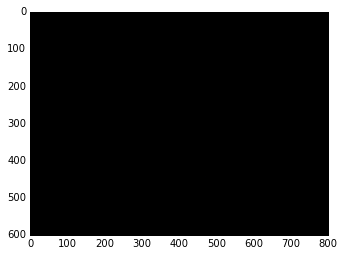

In [20]:
# попробуем создать пиксельное изображение с нашей камеры и отобразить точки на нем.
img = np.zeros(shape=(img_size[0], img_size[1], 3), dtype='uint8')

img_pts = projected_pts.astype('int') # переводим к целым координатам пикселей
# выделим только те точки, которые попадают в изображение
img_pts = img_pts[(img_pts[:, 0] >= 0) & (img_pts[:, 1] >= 0) & 
                  (img_pts[:, 0] < img_size[0]) & (img_pts[:, 1] < img_size[1])]

colors = np.random.uniform(0, 256, size=(img_pts.shape[0], 3)).astype('uint8')
img[img_pts[:, 0], img_pts[:, 1], :] = colors
plt.imshow(img) # вот так можно отобразить получившееся изображение
plt.show()


Итак, мы научились работать с растровыми изображениями.
Теперь попробуем применить наши знания к реальным данным.
В директории ../data/ вы можете найти изображение и облако точек, полученное с лидара - лазерного сканера, определяющее расстояния до точек в некотором телесном угле.
Изображение и точки взяты из общедоступного датасета KITTI (http://www.cvlibs.net/datasets/kitti/)

### Задача 4.6
Отобразить точки с лидара на изображении.

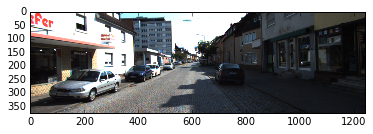

In [21]:
# взглянем на данные.
# изображение
%matplotlib inline
import scipy.ndimage
image = scipy.ndimage.imread('../data/kitti_test_image.png')
plt.imshow(image)
plt.show()

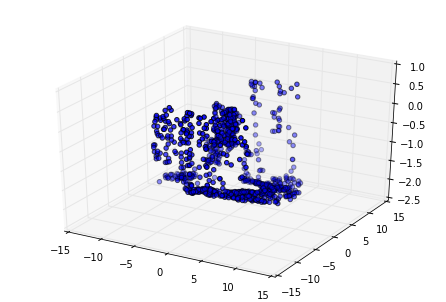

In [22]:
# точки с лидара
points = np.load('../data/points.npy')
f = plt.figure()
ax = mplot3d.Axes3D(f)
pts = points[np.random.randint(0, points.shape[0], 1000), :] # отобразим только часть точек, чтобы не было тормозов
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2])
plt.show()

Для успешного решения задачи необходимы параметры камеры и взаимной установки камеры и лидара.
Эта информация приводится в датасете KITTI.
Для простоты здесь будет все что нужно.

In [23]:
K = np.array([[9.597910e+02, 0.000000e+00, 6.960217e+02],
              [0.000000e+00, 9.569251e+02, 2.241806e+02],
              [0.000000e+00, 0.000000e+00, 1.000000e+00]], 
             dtype='float64')
# to_lidar transform,  вам нужно обратное.
R_to_lidar = np.array([[7.533745e-03, -9.999714e-01, -6.166020e-04],
                           [1.480249e-02,  7.280733e-04, -9.998902e-01],
                           [9.998621e-01,  7.523790e-03,  1.480755e-02]],
                          dtype='float64')
t_to_lidar = np.array([-4.069766e-03, -7.631618e-02, -2.717806e-01],
                          dtype='float64')

#камера расположена немного левее начала с.к.
R_cam = np.ones((3,3), dtype='float64')
t_cam = np.array([5.956621e-02, 2.900141e-04, 2.577209e-03],
                 dtype='float64')
img_size = image.shape

In [24]:
# отображение точек с лидара pts на изображение image.

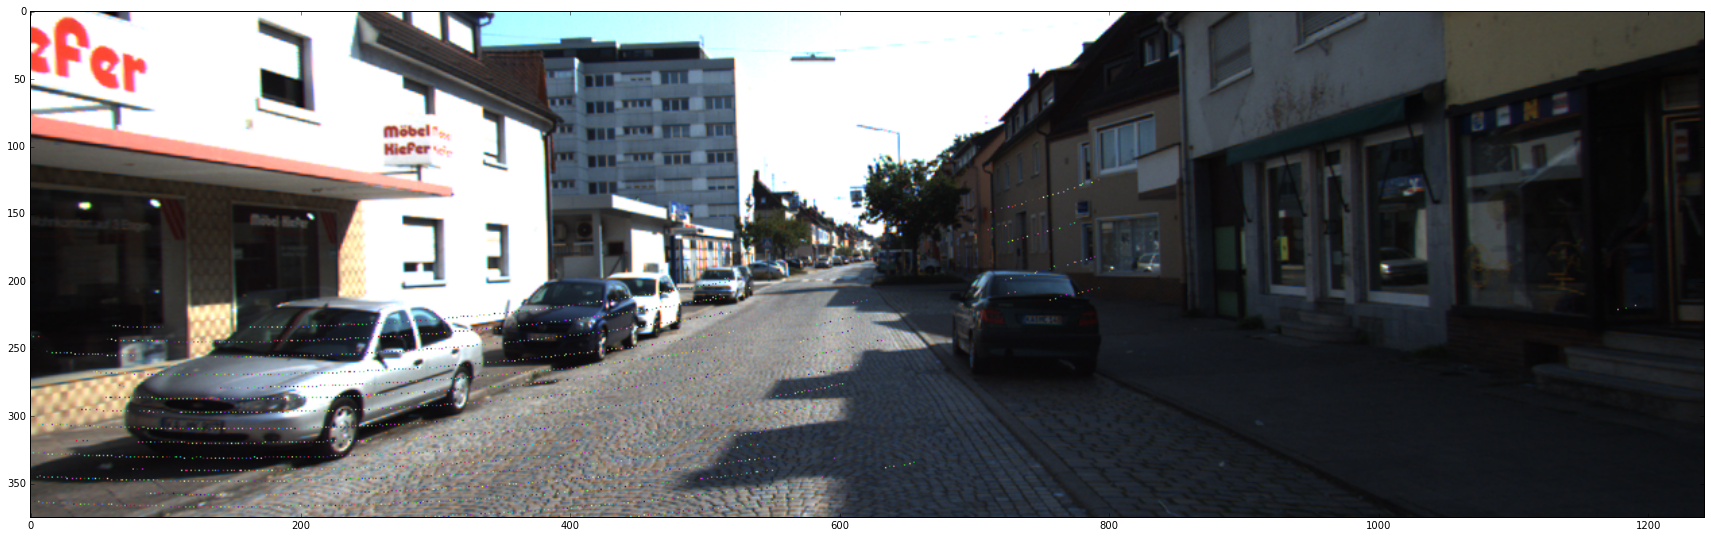

In [25]:
# попробуем создать пиксельное изображение с нашей камеры и отобразить точки на нем.
img = image
cam = Camera(R=np.linalg.inv(R_to_lidar), t=-multiply(t_to_lidar + t_cam, R_to_lidar), K=K, size=img_size)
projected_pts = cam.project(points).astype(int)
img_pts = projected_pts.astype('int') # переводим к целым координатам пикселей
# выделим только те точки, которые попадают в изображение
img_pts = img_pts[(img_pts[:, 0] >= 0) & (img_pts[:, 1] >= 0) & 
                  (img_pts[:, 0] < img_size[0]) & (img_pts[:, 1] < img_size[1])]

colors = np.random.uniform(0, 256, size=(img_pts.shape[0], 3)).astype('uint8')
img[img_pts[:, 0], img_pts[:, 1], :] = colors
plt.figure(figsize=(30, 40))
plt.imshow(img) # вот так можно отобразить получившееся изображение
plt.show()

## Заключение
Поздравляю, вы завершили выполнение практической работы номер 1. - Геометрия и центральная проекция.
Надеюсь, вам было так же интересно выполнять задание как и мне его составлять.
, 
Чтобы сдать задание можно
1) сделать fork репозитория
2) создать бранч с названием-вашей фамилией
3) закоммитить и сделать pull request.

или просто прислать выполненный .ipynb файл мне на емейл vicproon [at] gmail.
(лучше пулл реквест, так как я хочу посмотреть, как это будет работать для студенческих заданий).

Если вы нашли ошибку в коде или хотите что-то улучшить, можете так же сделать пулл реквест с понятным именем бранча.